In [1]:
#import basis and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#import data
#train_data = pd.read_csv('data/train.csv')
#test_data = pd.read_csv('data/test.csv')

data = pd.read_csv('data/train.csv')


In [3]:
#split data into 30% test and 70% train, random_state = 123, stratify = 'label', xtrain, xtest, ytrain, ytest

train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['label'])

In [4]:
#random stratified sample the data 10% for quicker run time
## how can I stratify this?
#train_data = train.sample(frac=0.1, replace=True, random_state=123, )
#test_data = test.sample(frac=0.1, replace=True, random_state=123, )

train_data = train
test_data = test

train_data = train.sample(frac=0.05, replace=True, random_state=123, )
test_data = test.sample(frac=0.1, replace=True, random_state=123, )

In [5]:
#confirm stratification
train_data['label'].value_counts()

1    3279
7    3081
3    3046
9    2932
2    2924
6    2896
0    2892
4    2850
8    2844
5    2656
Name: label, dtype: int64

In [6]:
#confirm stratification
test_data['label'].value_counts()

1    1405
7    1320
3    1305
9    1256
2    1253
6    1241
0    1240
4    1222
8    1219
5    1139
Name: label, dtype: int64

In [ ]:
#graph confirm stratification
sns.countplot(train_data['label'])

In [7]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40145,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21829,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17754,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41465,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28547,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.head()
#test_data doesnt have a label column... why is that?

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19626,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9222,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18617,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25143,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21722,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# parameters for SVM model
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
#drop the label column from the test data if exists
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [10]:
model_svc = SVC()

In [11]:
#fit the model
model_svc.fit(x_train, y_train)
#score the model
model_svc.score(x_train, y_train)

0.9889115646258504

In [12]:
# predict the test data
y_pred = model_svc.predict(x_test)

#accuracy score
print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.9753174603174604
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1240
           1       0.98      0.99      0.99      1405
           2       0.97      0.98      0.98      1253
           3       0.97      0.97      0.97      1305
           4       0.97      0.98      0.98      1222
           5       0.97      0.96      0.97      1139
           6       0.98      0.98      0.98      1241
           7       0.98      0.98      0.98      1320
           8       0.98      0.97      0.97      1219
           9       0.97      0.96      0.96      1256

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



## Seems like the model with default parameters performed best. With an accuracy of 98%

In [13]:
# for loop to create different svm models with different parameters store both the score and the model
training_acc = []
test_acc = []
maxRange = 10
for i in range(1, maxRange):
    model_svc = SVC(C=i)
    model_svc.fit(x_train, y_train)
    training_acc.append(model_svc.score(x_train, y_train))
    test_acc.append(model_svc.score(x_test, y_test))
    #if model_svc.score(x_test, y_test) = 1: stop the loop, since no test, use train for now
    # if model_svc.score(x_train, y_train) == 1:
    #     #break after next iteration
    #     break
    #print(model_svc.score(x_train, y_train))

plt.plot(range(1, len(training_acc)+1), training_acc, color="blue", label="training accuracy")
plt.plot(range(1, len(test_acc)+1), test_acc,  color="red", label="test accuracy")

In [ ]:
# for loop to create different svm models with different gamma, C, and kernel parameters store both the score and the model
training_acc = []
test_acc = []
maxRange = 25

#create a dictionary to store the parameters and the score
param_score = {}
ker = np.random.choice(['linear', 'poly', 'rbf', 'sigmoid'])

#for every kernel, run 5 random C and gamma values
for kernel in ker:
    for i in range(1, 5):
        #randomly select gamma, C, and kernel
        gamma = np.random.randint(1, maxRange)
        C = np.random.randint(1, maxRange)
        model_svc = SVC(gamma=gamma, C=C, kernel=kernel)

        #fit the model
        model_svc.fit(x_train, y_train)
        training_acc.append(model_svc.score(x_train, y_train))
        test_acc.append(model_svc.score(x_test, y_test))

        #if model_svc.score(x_test, y_test) = 1: store model info. since no test, use train for now
        if model_svc.score(x_test, y_test) >= .5:
            #store the parameters in param_score with the loop number as the key and gamma, C, kernel, score as names
            param_score[i] = {'gamma': gamma, 'C': C, 'kernel': kernel, 'score': model_svc.score(x_test, y_test)}
        #print(model_svc.score(x_train, y_train))

KeyboardInterrupt: 

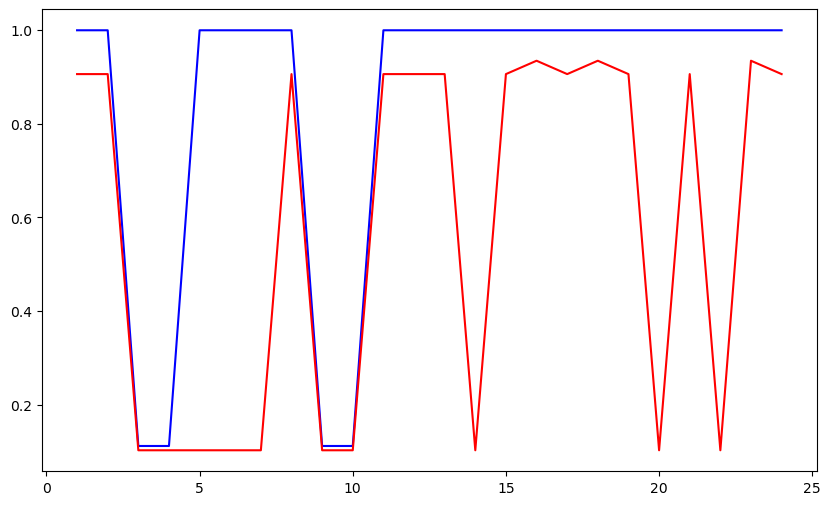

In [ ]:
#figure size
plt.figure(figsize=(10, 6))
#plot the training accuracy from 1 to maxRange
plt.plot(range(1, len(training_acc)+1), training_acc,color="blue", label="training accuracy")
plt.plot(range(1, len(training_acc)+1), test_acc, color = 'red', label="testing accuracy")

In [ ]:
print(param_score)

{1: {'gamma': 20, 'C': 22, 'kernel': 'linear', 'score': 0.9063492063492063},
 2: {'gamma': 9, 'C': 3, 'kernel': 'linear', 'score': 0.9063492063492063},
 8: {'gamma': 2, 'C': 1, 'kernel': 'linear', 'score': 0.9063492063492063},
 11: {'gamma': 24, 'C': 1, 'kernel': 'linear', 'score': 0.9063492063492063},
 12: {'gamma': 11, 'C': 22, 'kernel': 'linear', 'score': 0.9063492063492063},
 13: {'gamma': 9, 'C': 16, 'kernel': 'linear', 'score': 0.9063492063492063},
 15: {'gamma': 10, 'C': 18, 'kernel': 'linear', 'score': 0.9063492063492063},
 16: {'gamma': 10, 'C': 18, 'kernel': 'poly', 'score': 0.9349206349206349},
 17: {'gamma': 13, 'C': 18, 'kernel': 'linear', 'score': 0.9063492063492063},
 18: {'gamma': 5, 'C': 14, 'kernel': 'poly', 'score': 0.9349206349206349},
 19: {'gamma': 10, 'C': 7, 'kernel': 'linear', 'score': 0.9063492063492063},
 21: {'gamma': 19, 'C': 6, 'kernel': 'linear', 'score': 0.9063492063492063},
 23: {'gamma': 11, 'C': 5, 'kernel': 'poly', 'score': 0.9349206349206349},
 24: 

## successful parameters
{1: {'gamma': 17, 'C': 17, 'kernel': 'linear', 'score': 1.0},
 3: {'gamma': 8, 'C': 18, 'kernel': 'poly', 'score': 1.0},
 6: {'gamma': 15, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 8: {'gamma': 12, 'C': 13, 'kernel': 'poly', 'score': 1.0},
 10: {'gamma': 18, 'C': 14, 'kernel': 'linear', 'score': 1.0},
 14: {'gamma': 14, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 15: {'gamma': 9, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 16: {'gamma': 16, 'C': 5, 'kernel': 'poly', 'score': 1.0},
 17: {'gamma': 11, 'C': 14, 'kernel': 'poly', 'score': 1.0},
 18: {'gamma': 13, 'C': 13, 'kernel': 'poly', 'score': 1.0},
 19: {'gamma': 11, 'C': 3, 'kernel': 'linear', 'score': 1.0}}

In [ ]:
#using the best parameters from the loop above
model_svcFinal = SVC(gamma='auto', C=3, kernel='poly')
model_svcFinal.fit(x_train, y_train)
model_svcFinal.score(x_train, y_train)


1.0

In [ ]:
#score test data
model_svcFinal.score(x_test, y_test)


0.9349206349206349

In [ ]:
#predict test data
y_pred = model_svcFinal.predict(x_test)

#accuracy score

print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))


0.9349206349206349
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       118
           1       0.86      0.97      0.91       129
           2       0.96      0.92      0.94       139
           3       0.88      0.92      0.90       125
           4       0.95      0.94      0.95       122
           5       0.97      0.91      0.94       126
           6       0.95      0.95      0.95       102
           7       0.95      0.97      0.96       153
           8       0.95      0.90      0.93       133
           9       0.94      0.91      0.93       113

    accuracy                           0.93      1260
   macro avg       0.94      0.93      0.93      1260
weighted avg       0.94      0.93      0.94      1260

